# Results from mice behaviour analysis

Import libraries

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mice_behav_analysis as mba
import warnings
warnings.filterwarnings('ignore')

In [2]:
mba.set_paths(path_ops='Manuel')

Data loading

In [3]:
df_trials, df_params, subj_unq = mba.load_data()

### Accuracy across sessions

Visualizar la accuracy en cada trial SESSION de cada ratón nos permite distinguir como se comportan los sujetos en los tres diferentes stages.
De esta forma, podemos llegar a las siguientes conclusiones: 
- Algunos sujetos (e.g. N7, N14, N15, N17) una vez han alcanzado un determinado stage vuelven a uno inferior. 
- Generalmente, los ratones permanecen muy poco tiempo en el stage 2.
- Habitualmente, el stage 3 en el que más tiempo se mantienen.
- La accuracy siempre aumenta en el stage 1, mientras que una vez alcanzan el stage 3 suele disminuir (esto sucede porque la dificultad aumenta dentro del stage 3 (delays cada vez más largos) y como consecuencia, la accuracy disminuye).
- Los máximos absolutos de accuracy generalmente se alcanzan en el stage 2, ya que como hemos dicho, al cambiar al stage 3, la accuracy disminuye.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


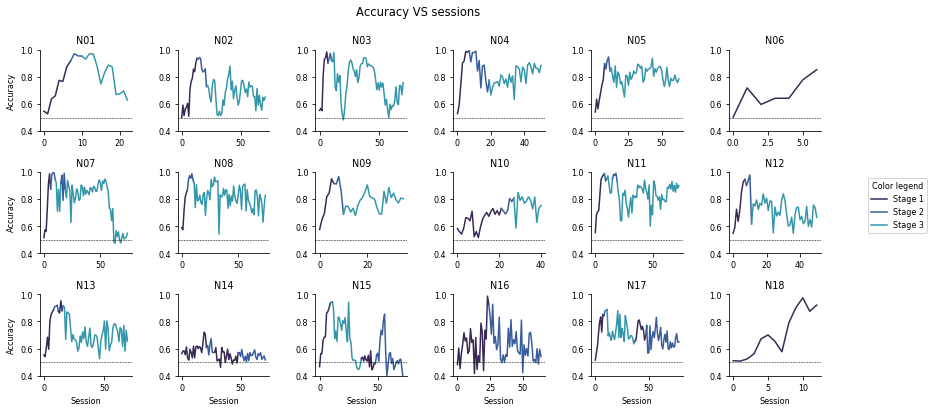

In [4]:
# TODO: stage 4?
# TODO: make figure larger by changing the number of columns/rows
mba.plot_final_acc_session_subj(subj_unq=subj_unq, df_params=df_params, figsize=(14, 6))

### Mean accuracy at stage change for sessions

Tras haber analizado las gráficas anteriores, es interesante observar en más en detalle cómo son los cambios entre los diferentes stages y con qué frecuencia se da cada tipo de cambio.

Así, obtenemos la siguiente figura en la que podemos ver para cada cambio de stage el número de veces que se repite a lo largo de todos los sujetos (e.g. N=21) ?? y los valores medios de la accuracy junto con la desviación standard antes y después de cada cambio (con una ventana de 10 sesiones antes y después del cambio). 

Los cambios más recurrentes son 1-2 y 2-3, es decir, el orden natural de desarrollo. En el resto apenas tenemos información. 

- En el **cambio '1-2'** podemos observar que cuando se va a dar el cambio, la accuracy aumenta notablemente y ya en el stage 2, en las sesiones justo después del cambio, aumenta la accuracy. Es cierto, que conforme evolucionan las sesiones la accuracy media va disminuyendo. ESTO PUEDE SER PORQUE EL CAMBIO A STAGE 3 ES MUY RÁPIDO
- En el **cambio '2-3'** si que observamos una notable disminución de la accuracy justo al cambiar de stage. Esto seguramente se debe a que, como hemos dicho anteriormente, un aumento de dificultad (DADO QUE SE INTRODUCEN EL MOTOR Y LOS DELAYS) de la tarea causa que el ratón no obtenga tan buenos resultados. 
- Para el resto de cambios, aunque podemos observar las gráficas, debido a la falta de datos (tan solo tenemos 2 ratones que experimentan cada uno de los cambios), no podemos extraer conclusiones sólidas. 

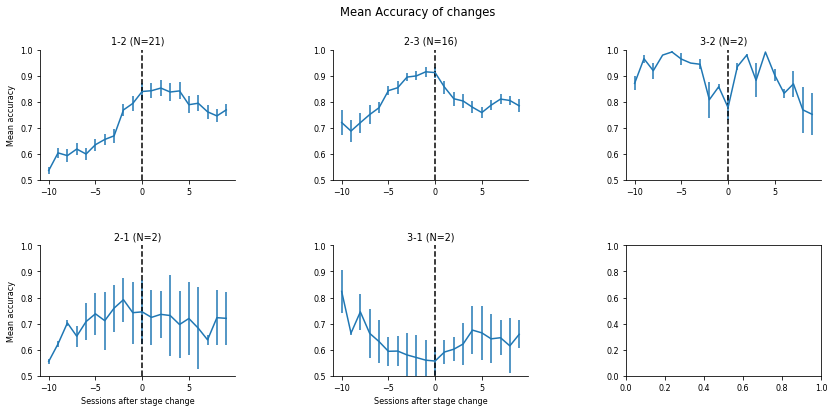

In [5]:
prev_w = 10
nxt_w = 10
mat_mean_perfs, mat_std_perfs, num_samples = mba.accuracy_at_stg_change(df_params,
                                                                    subj_unq,
                                                                    prev_w=prev_w,
                                                                    nxt_w=nxt_w)
mba.plot_means_std(mat_mean_perfs, mat_std_perfs, num_samples, prev_w=prev_w,
                   nxt_w=nxt_w, figsize=(14, 6))

Como hemos comentado analizando la primera figura del documento, el stage 3 es en el que más tiempo permanecen los sujetos y es el que más información nos puede ofrecer, ya que solo en el stage 3 se activa el motor y encontramos delays. 

Por ello, hemos decidido crear una figura en la que podamos observar los diferentes acontemientos que suceden en el stage 3 para poder así fragmentar el stage 3 en dos stages diferentes. 

- En cuanto a los motores, observamos que el **Motor_in** nos indica el comienzo de activación del motor, y el **Motor_out** permanece activado desde que el Motor_in se activa hasta el fin del entrenamiento del sujeto. Frecuentemente, el stage del motor va aumentando hasta llegar a su máximo (6.0) al final de los trials (como se puede observar en la línea naranja) y una vez ha llegado al máximo suele mantener esta posición sin volver a valores del motor más bajos. 
- Además, se puede apreciar como los delays tan solo tienen lugar cuando el stage del motor es el máximo 
- También observamos como el motor en algunas ocasiones se introduce en el stage 2 (e.g. N03), pero esto se debe a un error, ya que no es algo que debería pasar.

Finalmente, gracias a la siguiente figura (Plot motor and delay variables) decidimos crear un stage adicional, el stage 4, el cual se crea cuando se cumplen dos condiciones: 
- El sujeto está en el stage 3.
- El motor 6.0 está activado. 

### Plot motor and delay variables

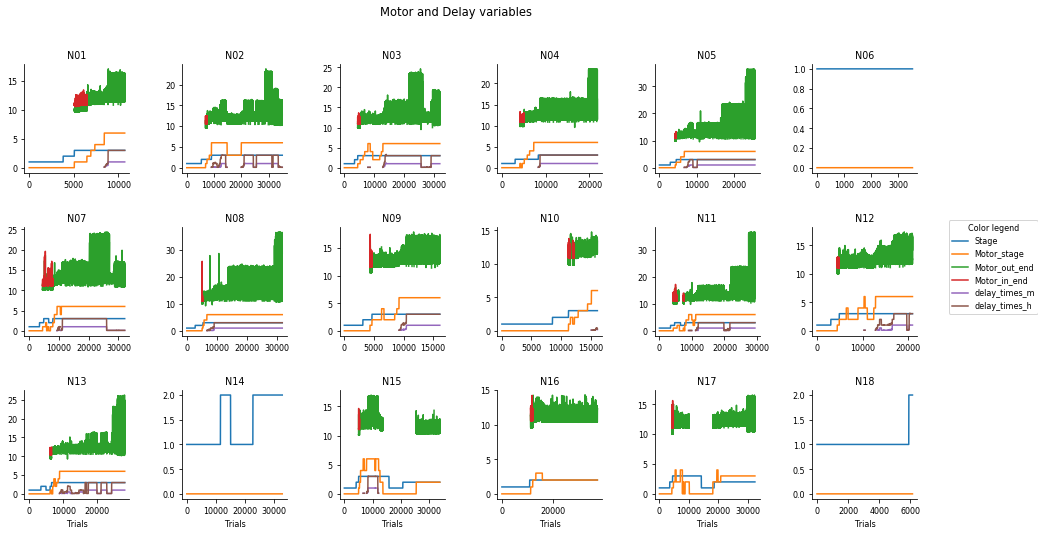

In [6]:
# TODO: make figure larger by changing the number of columns/rows
mba.plot_final_stage_motor_delay(subj_unq, df=df_trials, df_prms=df_params, figsize=(16, 8))

### Accuracy across trials adding a fourth stage

En la siguiente imagen podemos observar la accuracy para todos los trials de cada sujeto. Como hemos dicho previamente, hemos añadido el cuarto stage. 
Por lo tanto, obtenemos la misma imagen que antes, pero con esta subdivisión del stage 3. 

De esta forma, podemos concluir que en algunas ocasiones (e.g. N02, N03, N08, N11, N12, N15) es habitual que se encuentren en el último stage (stage 3 y motor 6 activado), pero por una caída de la accuracy, es decir, un mal entrenamiento, es necesario que vuelvan al stage 3 en el que no hay delays. De esta forma se facilita la tarea y la accuracy vuelve a incrementarse para volver al stage 4 de nuevo. 

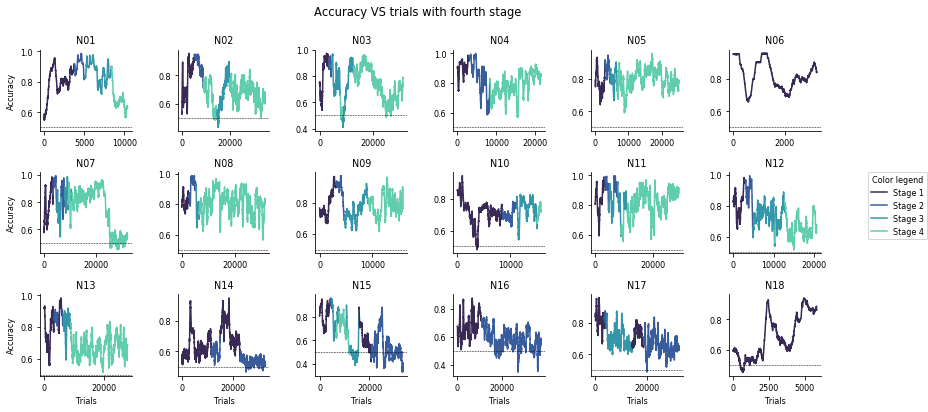

In [7]:
# The fourth is an aditional stage we created when the subject is at stage 3 and motor 6 is activated
dataframe_4stage_with_misses = mba.dataframes_joint(df_trials, df_params, subj_unq)
dataframe_4stage = mba.remove_misses(dataframe_4stage_with_misses)
mba.plot_final_acc_session_subj_stage4(subj_unq, dataframe_4stage, figsize=(14, 6))

### Mean accuracy at stage change for trials taking into account the misses

Al añadir este cuarto stage, podemos volver a observar la accuracy media y la desviación estandard para cada cambio de stage, incluyendo este último. 

En este caso, estamos visualizando los trials en vez de las sesiones, por lo que es conveniente escoger una ventana mayor (40 trials previos y futuros). Es importante tener en cuenta que cada sesión tiene unos 400/500 trials, aunque puede tener menos o más (máximo 898 trials). 

Los cambios más recurrentes son 1-2, 2-3, y 3-4, y por lo tanto, para el resto no hay suficientes datos para poder visualizar bien la información. 

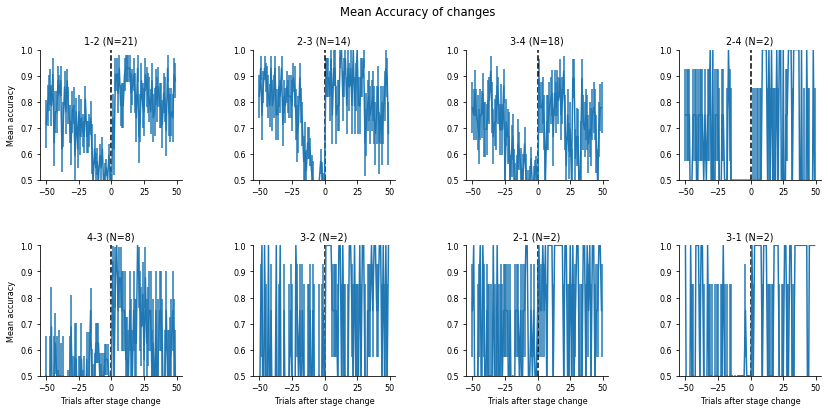

In [8]:
df_trials_without_misses = mba.remove_misses(df_trials)
dataframe_4stage = mba.dataframes_joint(df_trials_without_misses,
                                    df_params, subj_unq)
prev_w = 50
nxt_w = 50
mat_mean_perfs, mat_std_perfs, num_samples = mba.accuracy_at_stg_change_trials(dataframe_4stage, subj_unq,
                                                                               prev_w=prev_w, nxt_w=nxt_w,
                                                                               conv_w=0)
mba.plot_means_std(mat_mean_perfs, mat_std_perfs, num_samples, prev_w=prev_w, nxt_w=nxt_w, figsize=(14, 6))

### Trials accuracy of all the subjects taking into account the misses

Para poder visualizar la accuracy de cada ratón a lo largo de los trials con mayor precisión hemos decidido representar cada ratón por separado. Cada una de las líneas grises indica un cambio de sesión. 

Es recurrente encontrar que un cambio de sesión se corresponde con un pico en la accuracy.
Además, observamos como, en general, cuando el sujeto se encuentra en el stage 4 la acuraccy es más baja, mientras que en el stage 1 siempre tiende a aumentar. 

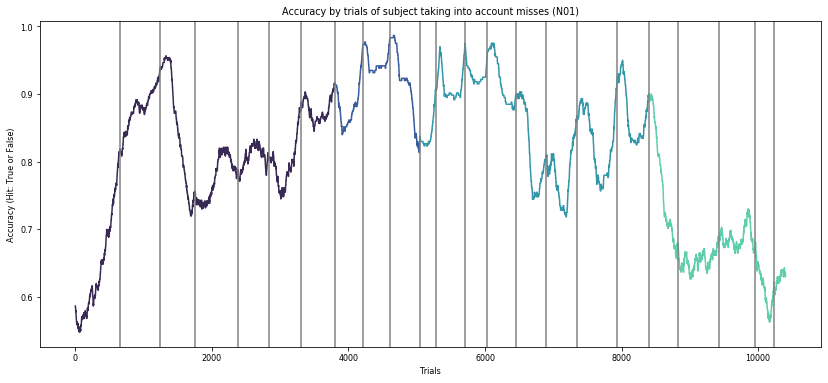

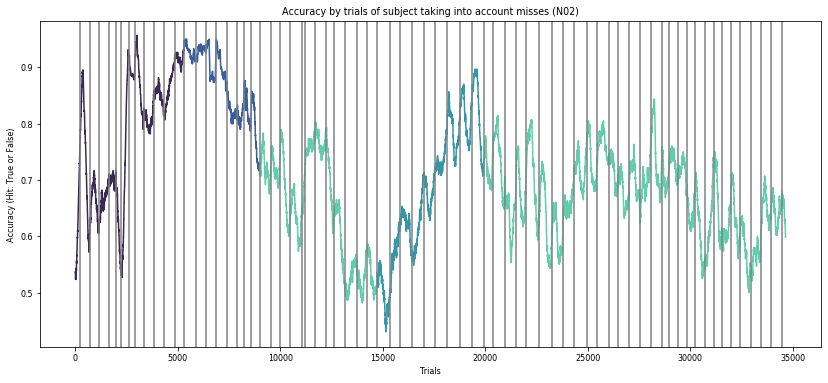

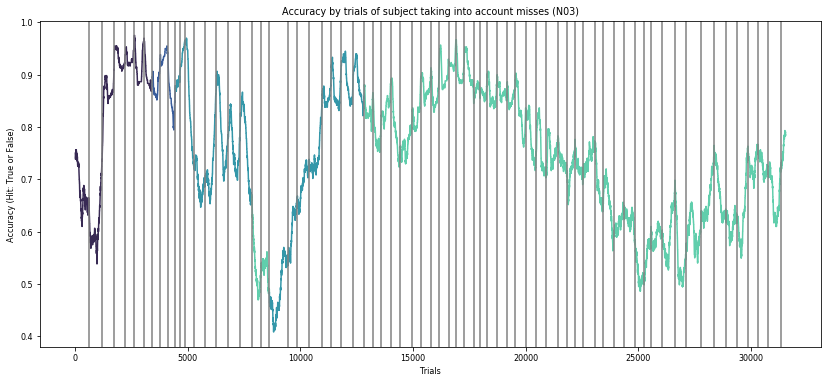

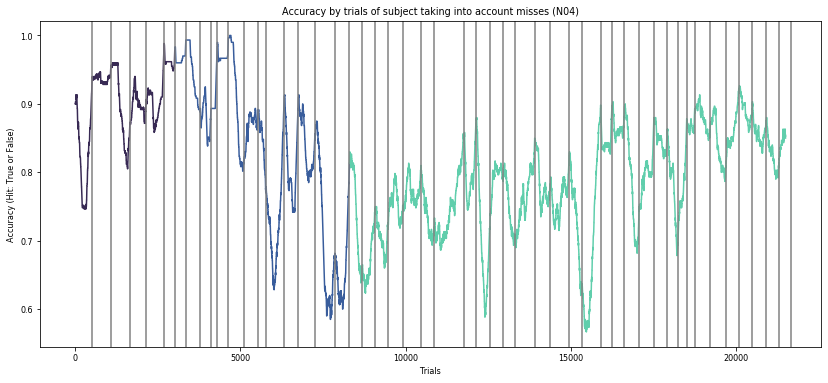

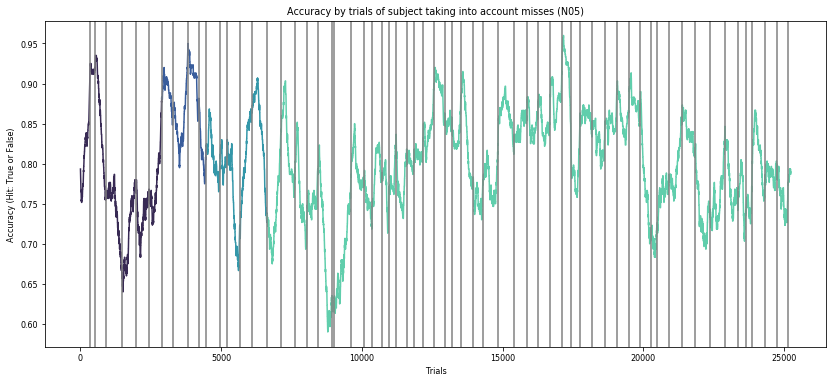

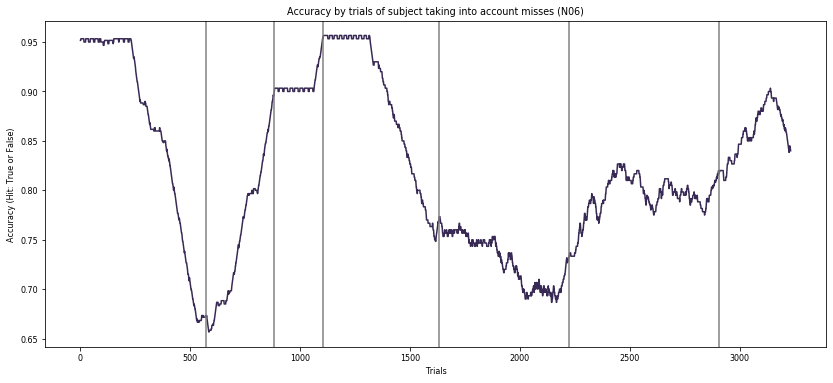

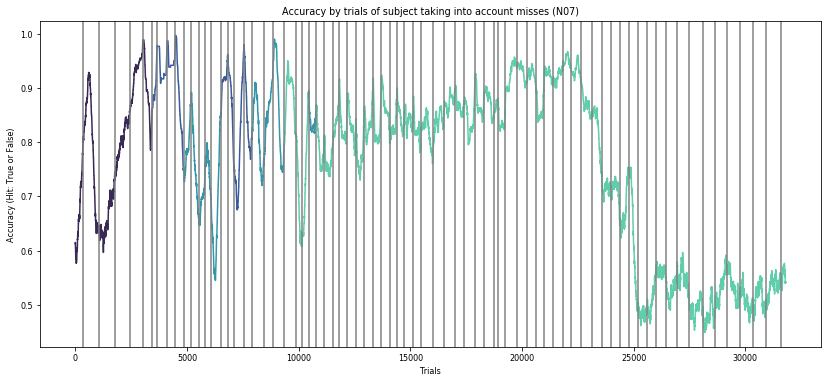

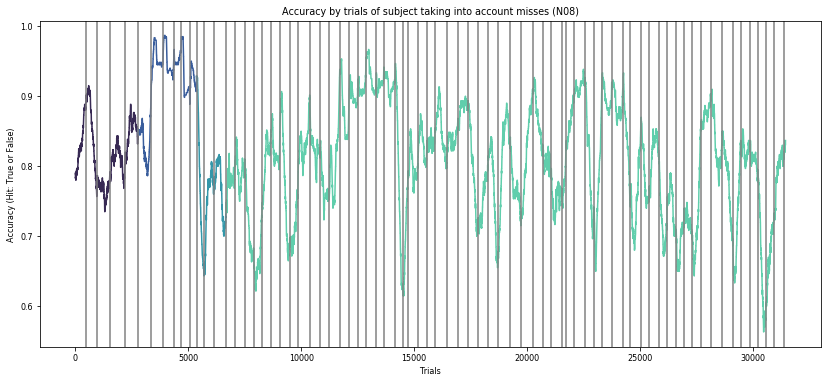

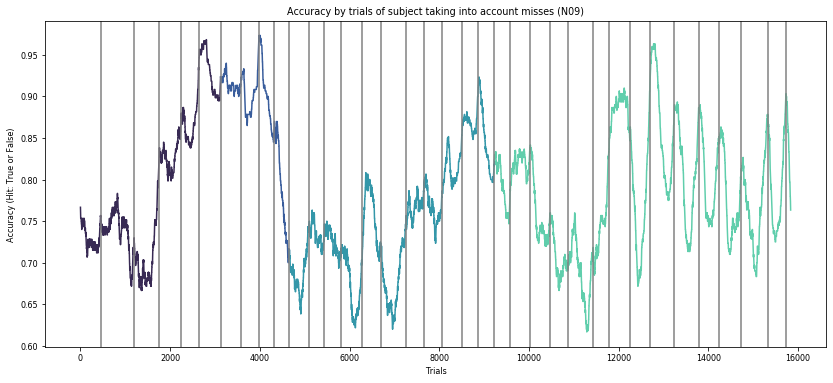

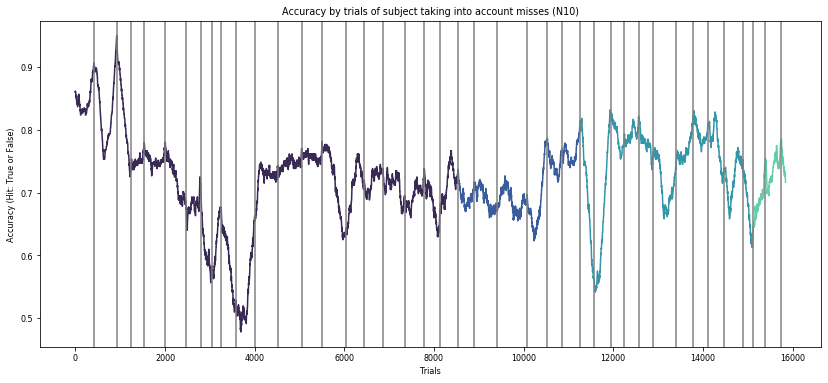

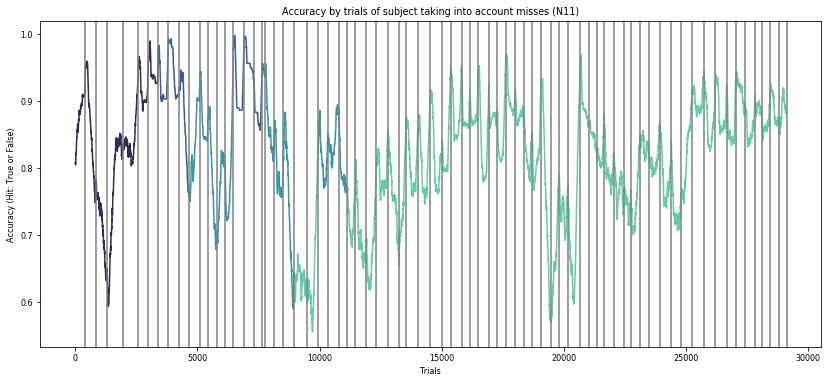

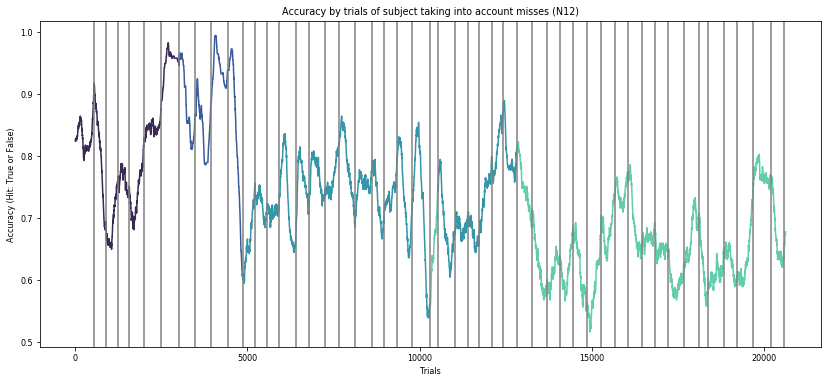

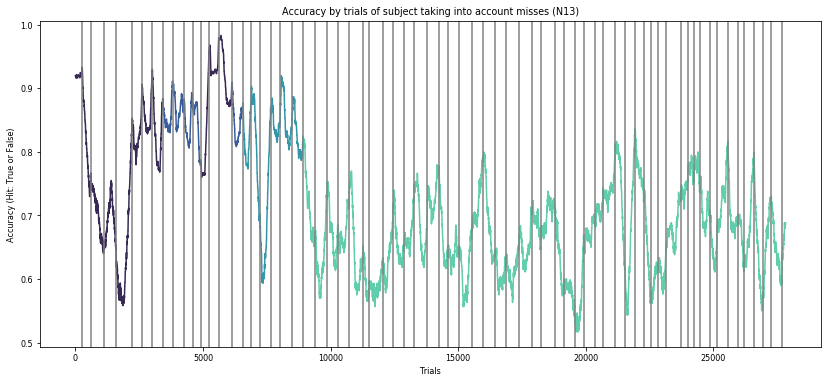

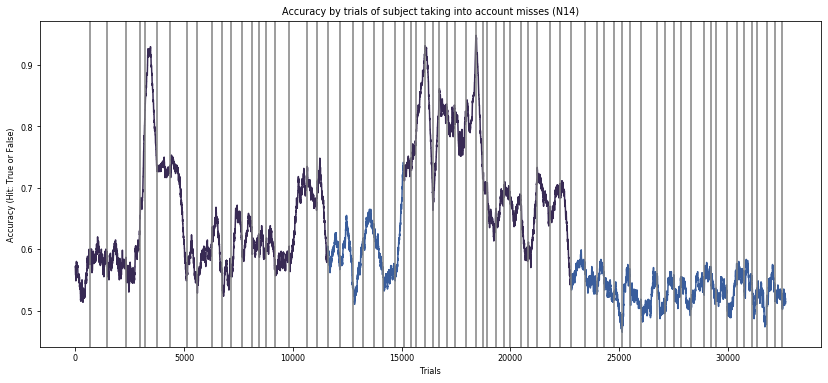

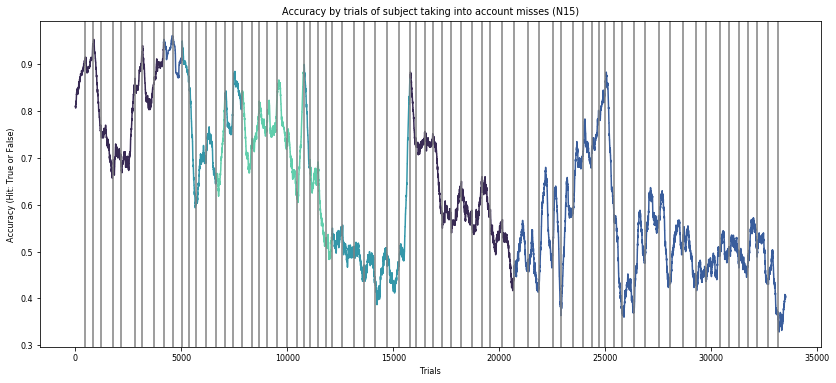

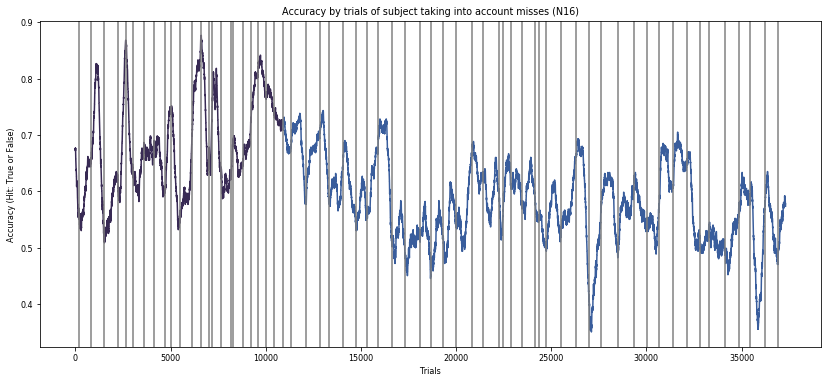

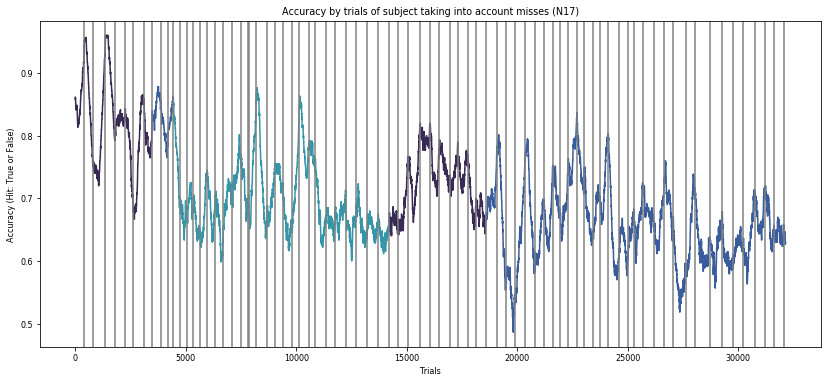

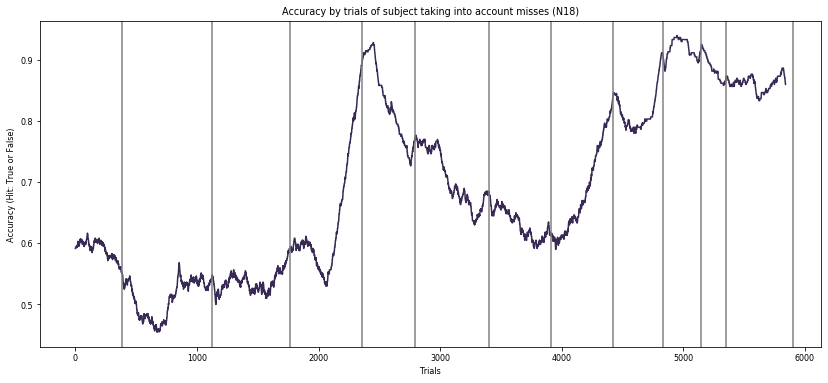

In [9]:
dataframe_4stage = mba.dataframes_joint(df_trials, df_params, subj_unq)
# remove misses
df_trials_without_misses = mba.remove_misses(dataframe_4stage)
for i_s, sbj in enumerate(subj_unq):
    mba.plot_accuracy_trials_coloured_stage4(sbj, df_trials_without_misses,
                                             figsize=(14, 6))  # conv_w = 300

### Plot only the misses

Para poder observar la accuracy real de los ratones, es necesario tener en cuenta los misses. 

En la siguiente gráfica se encuentran representados los misses a lo largo de los trials por cada sujeto. Cuando la gráfica se acerca al 1 significa que el sujeto está dejando de responder. 

En general, se puede apreciar que en los primeros trials los valores son más altos que al final, es decir, al principio los ratones contestan más que al final, lo cual podría deberse a que la tarea es más sencilla ya que están es el stage 1. 

Por otra parte, podemos apreciar que al final de las sesiones tiendes a dejar de responder, lo cual se puede deber a que están cansados. 

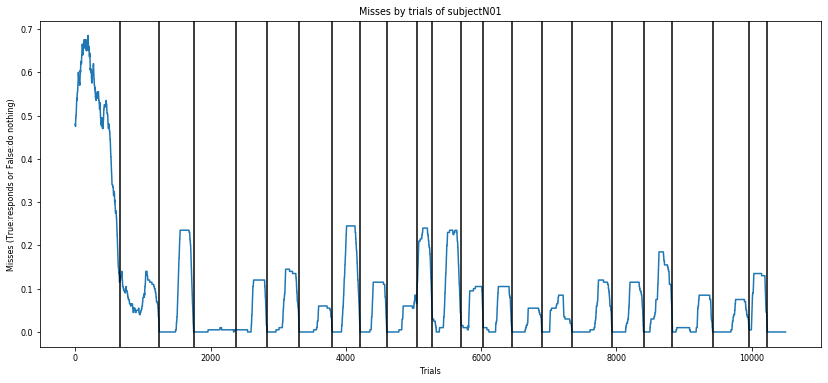

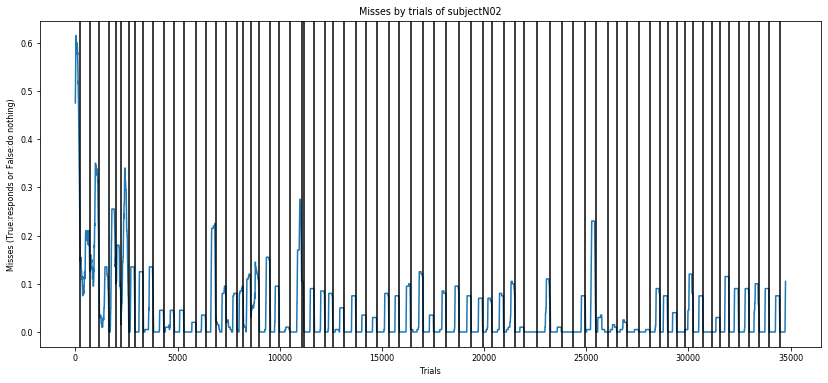

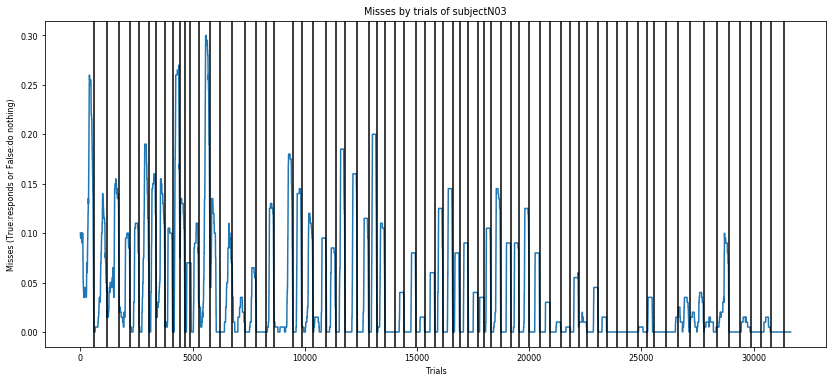

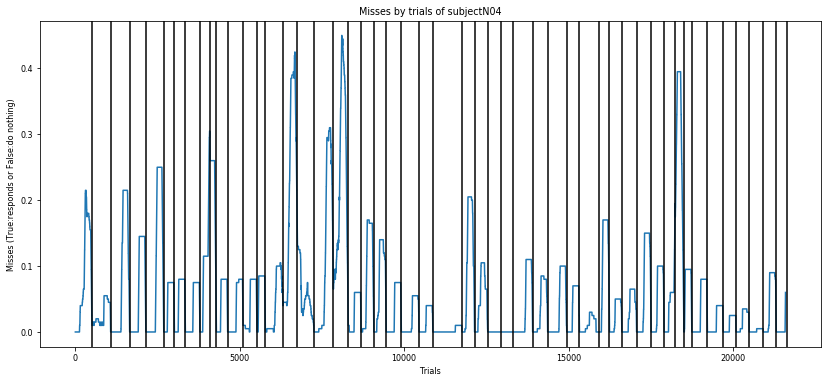

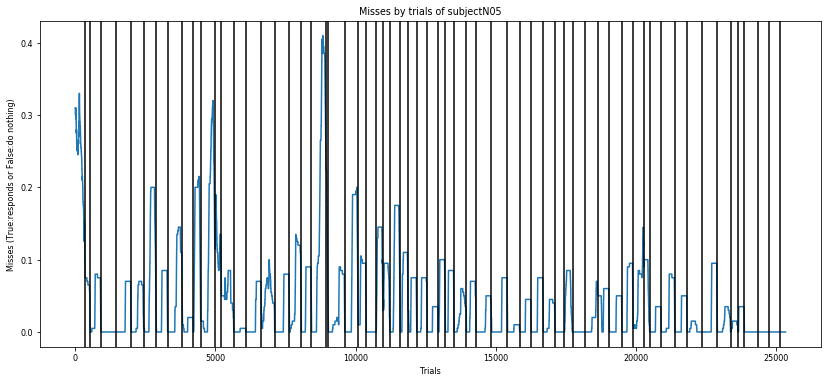

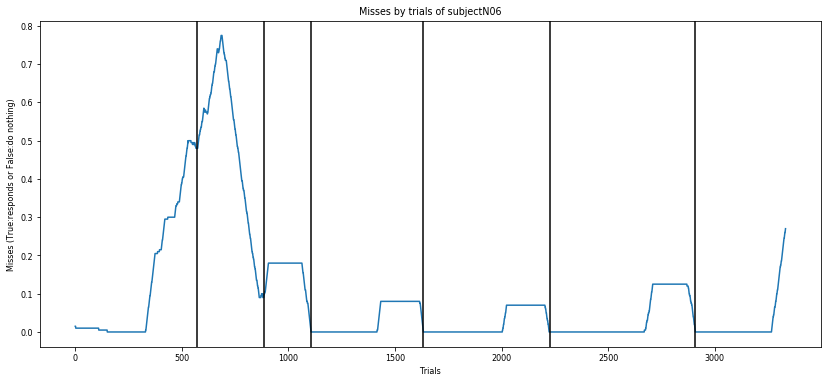

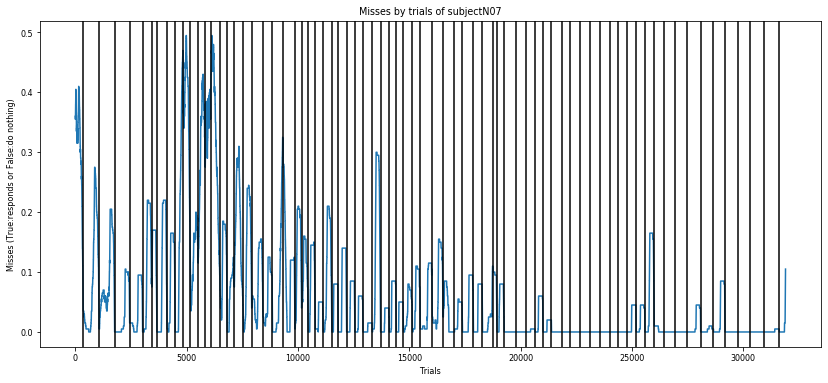

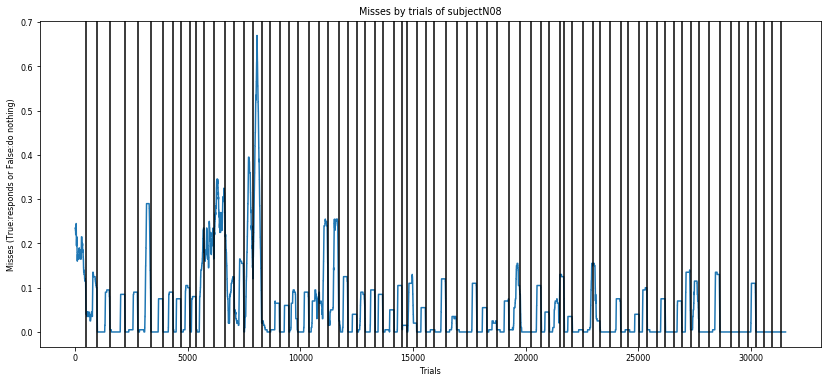

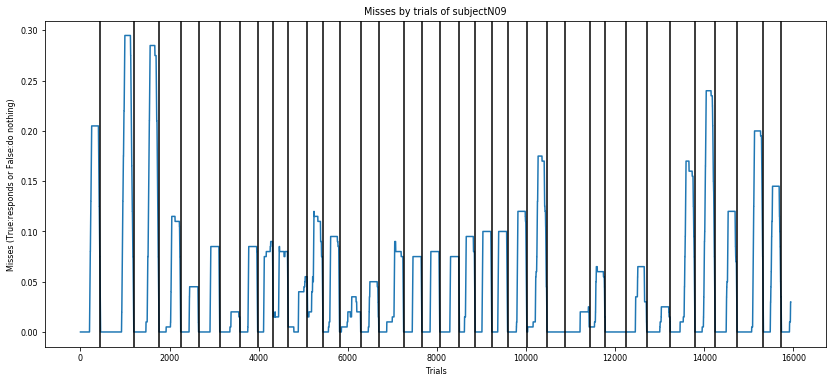

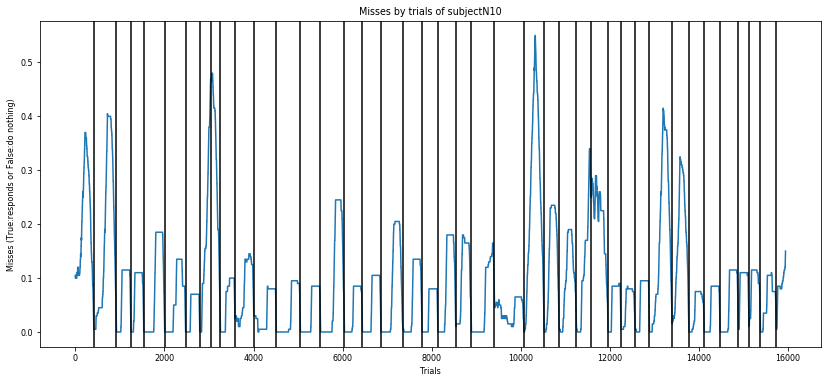

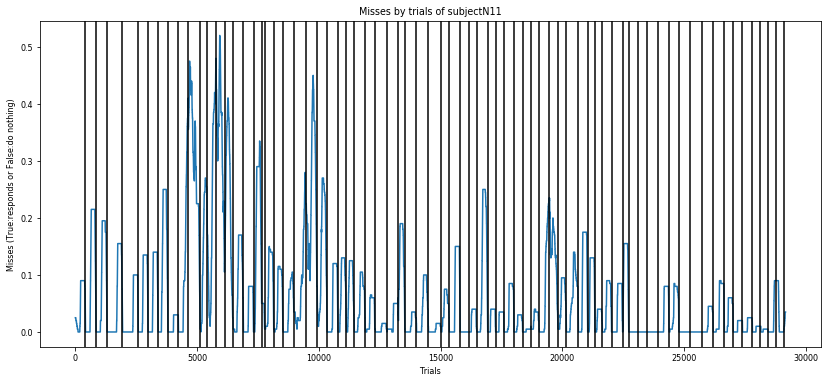

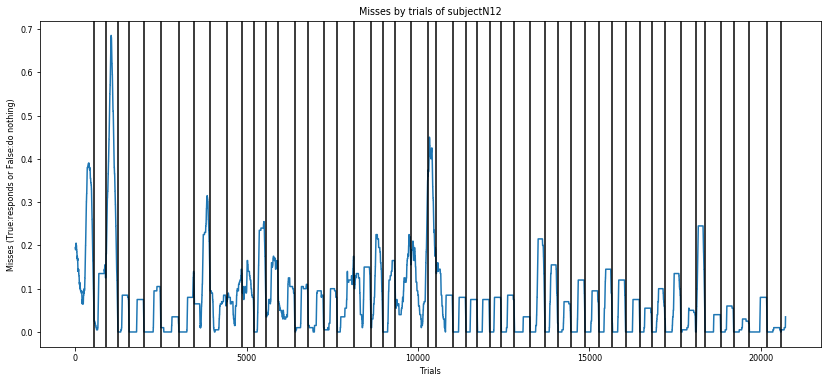

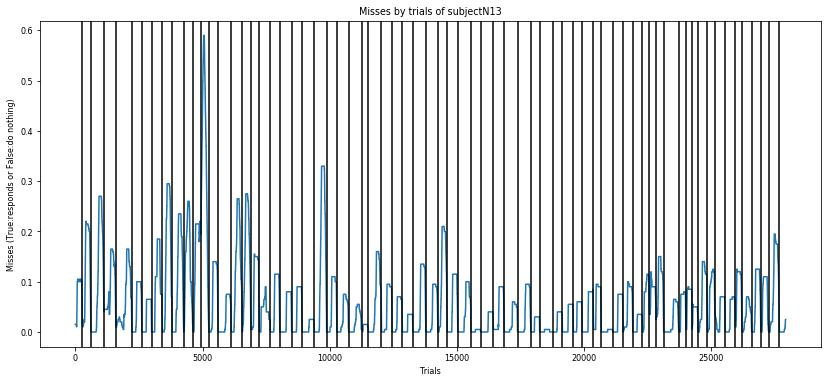

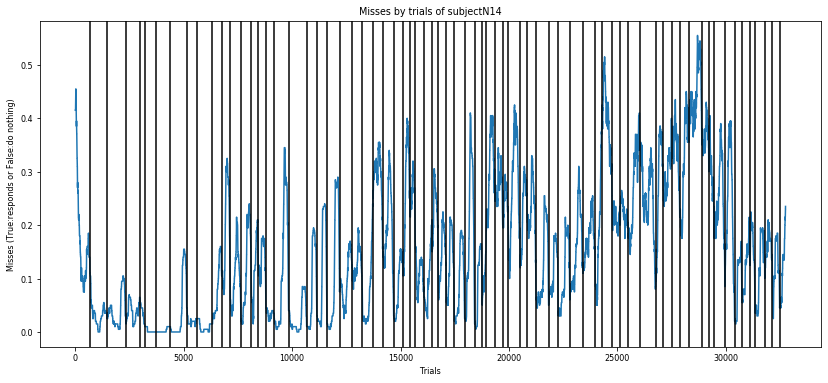

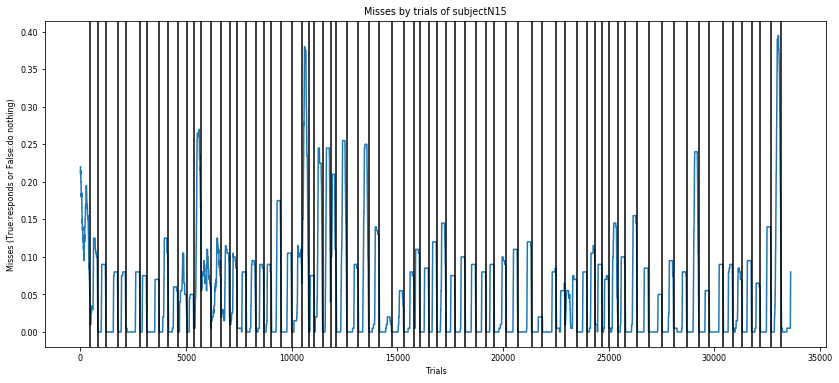

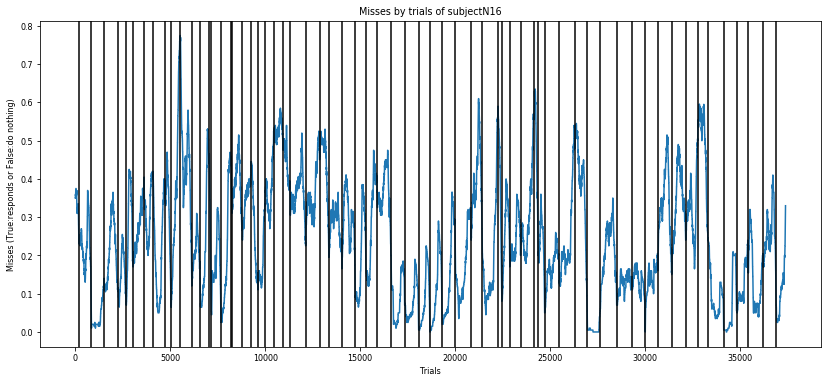

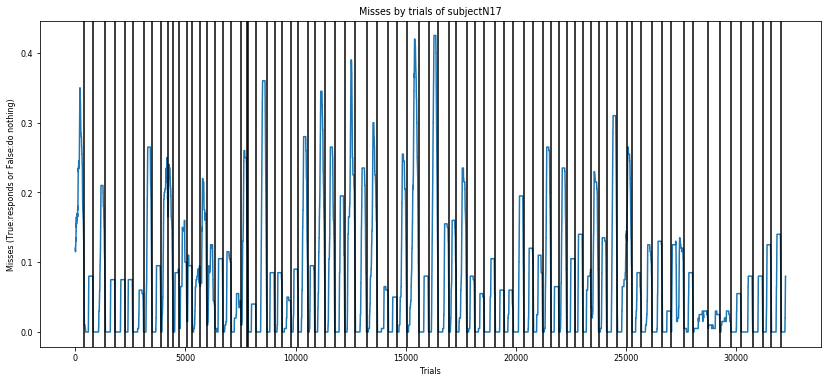

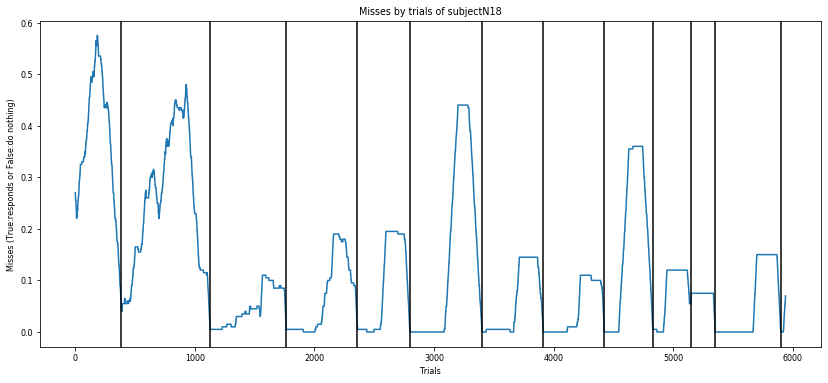

In [10]:
for i_s, sbj in enumerate(subj_unq):
    df_sbj_perf = mba.concatenate_misses(df_trials, sbj)
    mba.plot_misses_subj(df_trials, sbj, df_sbj_perf, conv_w=200, figsize=(14,6))

- We are analyzing data that contain shaping and data acquisition.
- Mice accuracy is very variable, with the level of satiety/tiredness having a huge impact on the behavior of the animals.
- The above point together with the fact that stages are design to provide a smooth transition for the animals, makes that changes at stage are not very informative.